# Identifying damage in car:

In [ ]:
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.2.5

     |████████████████████████████████| 411.5 MB 5.0 kB/s 
     |████████████████████████████████| 503 kB 53.4 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 3.8 MB 28.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=cc15275a0c056acdba735696e684a315e025ceac5bd78e2cfeb8faf0bdb935a6
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

     |████████████████████████████████| 336 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.2.2 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.5 which is incompatible.
tensorflow 2.6.0 requires tensorboard~=2.6, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.6.0 requires tensorflow-estimator~=2.6, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [ ]:
# !pip uninstall h5py
!pip install  h5py==2.10.0

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.2.2 which is incompatible.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.5 which is incompatible.
tensorflow 2.6.0 requires tensorboard~=2.6, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.6.0 requires tensorflow-estimator~=2.6, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [ ]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [ ]:
import urllib
from IPython.display import Image, display, clear_output
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')


import os
import h5py
import numpy as np
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model,Model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, History

In [ ]:
print(h5py.__version__)

2.10.0


In [ ]:
def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1./255)  #reads image from folder and perform data argumentation by resizing image 
    model = VGG16(include_top=False, weights='imagenet')   #train vgg model using imagenet dataset and remove top layer  
    #For train Images:-
    generator = datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode=None, shuffle=False) #read all the image from train folder
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    np.save(location+'/bottleneck_features_train.npy', bottleneck_features_train)  # save the features as numpy array file
    #For validation images:-   
    generator = datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode=None, shuffle=False)
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples // batch_size)
    np.save(location+'/bottleneck_features_validation.npy', bottleneck_features_validation)

In [ ]:
def plot_metrics(hist,stop=50):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))                            
    axes = axes.flatten()
    #plotting validation accuracy and accuracy
    axes[0].plot(range(stop), hist['acc'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist['val_acc'], label='Validation', color='#03507E')
    axes[0].set_title('Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
    #plot loss and validation losss
    axes[1].plot(range(stop), hist['loss'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist['val_loss'], label='Validation', color='#03507E')
    axes[1].set_title('Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper right')
                             
    plt.tight_layout();
    
    print("Best Model:")
    print(best_model_results(hist))

In [ ]:
def plot_acc_metrics(hist1, hist2, stop=50):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4.25,6))
                            
    axes = axes.flatten()
    
    axes[0].plot(range(stop), hist1['acc'], label='Training', color='#FF533D')
    axes[0].plot(range(stop), hist1['val_acc'], label='Validation', color='#03507E')
    axes[0].set_title('Training')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='lower right')
                             
    axes[1].plot(range(stop), hist2['acc'], label='Training', color='#FF533D')
    axes[1].plot(range(stop), hist2['val_acc'], label='Validation', color='#03507E')
    axes[1].set_title('Fine-tuning')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='lower right')
                             
    plt.tight_layout();

In [ ]:
def train_binary_model():
    train_data = np.load(location+'/bottleneck_features_train.npy') #load the data from .npy file
    train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2)) # the train folder containes 2 subfolder of damage and non-damaged images respectively
    #                                                                                           # label the damaged images [0] and non-damaged images [1]    
    validation_data = np.load(location+'/bottleneck_features_validation.npy')
    validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))
    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))   # add 1 node in dense layer as we have initally removed last layer
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    #save the weights at every step so that model having best performance can be saved
    checkpoint = ModelCheckpoint(top_model_weights_path, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
     # the model weights that are considered best are fit into the model
    fit = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size,validation_data=(validation_data,validation_labels), callbacks=[checkpoint])
    
    with open(location+'/top_history.txt', 'w') as f: #save the details of model in json file
        json.dump(fit.history, f) 
        
    return model, fit.history

In [ ]:
def finetune_binary_model():
    # fine-tuning allows us to reuse the filters learned during a previous training exercise.
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))    #load vgg16 using pre-trained imagenet weights
    print("Model loaded.")
    
    # constructing head of the model
    top_model = Sequential()  
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    top_model.add(Dense(256, activation='relu'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(1, activation='sigmoid')) #add last layer 
    
    top_model.load_weights(top_model_weights_path)  #load the weights of the model that has best performance
    #place the head of fc model on top of the base model and this will become actual model to train
    model = Model(inputs=base_model.input, outputs=top_model(base_model.output))  
    
    for layer in model.layers[:25]:   #freeze all the layers of base model so that they will not be updated during training
        layer.trainable = False
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    #Import train image from dataset and perform data argumentation
    train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
    # no argumentation needed for test data 
    test_datagen = ImageDataGenerator(rescale=1./255)
    #real all images from train folder
    train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')
    
    validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='binary')
    #save the model with best performance in fine_tuned_model_path
    checkpoint = ModelCheckpoint(fine_tuned_model_path, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
    #train the model
    fit = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples//batch_size, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples//batch_size, verbose=1, callbacks=[checkpoint])
    
    with open(location+'/ft_history.txt', 'w') as f:
        json.dump(fit.history, f)
    return model, fit.history


In [ ]:
def evaluate_binary_model(model, directory, labels):
  #eveluating performance of binary model by plotting confusion matrix
    datagen = ImageDataGenerator(rescale=1./255)  

    generator = datagen.flow_from_directory(directory,
                                target_size=(img_height, img_width),
                                batch_size=8,
                                class_mode='binary', # categorical for multiclass
                                shuffle=False)
    
    predictions = model.predict_generator(generator, len(labels))
    
    # use for multiclass
    # pred_labels = np.argmax(predictions, axis=1)
    
    pred_labels = [0 if i <0.5 else 1 for i in predictions]

    print('') 
    #precision, recall and f1_score
    print(classification_report(validation_labels, pred_labels))
    print('')
    cm = confusion_matrix(validation_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='g');

In [ ]:
def view_images(img_dir, img_list):
    for img in img_list:
        clear_output()
        display(Image(img_dir+img))
        num = input("c to continue, q to quit")
        if num == 'c':
            pass
        else:
            return 'Finished for now.'

In [ ]:
def best_model_results(model_hist):
  #best_epoch contaings model having highest  val accuracy. if it increases then best epoch is updated else it is same
    best_epoch = np.argmax(model_hist['val_acc'])
    print('epoch:', best_epoch+1, \
    ', val_acc:', model_hist['val_acc'][best_epoch], \
    ', val_loss:', model_hist['val_loss'][best_epoch])

In [ ]:
# path to the model weights file
location = '/content/drive/MyDrive/car-damage-detection-using-CNN/data/data1a'
top_model_weights_path = location+'/top_model_weights.h5' # will be saved into when we create our model
fine_tuned_model_path = location+'/ft_model.h5'

train_data_dir = location+'/training'
validation_data_dir = location+'/validation'
train_samples = [len(os.listdir(train_data_dir+'/'+i)) for i in sorted(os.listdir(train_data_dir))]
nb_train_samples = 1824
validation_samples = [len(os.listdir(validation_data_dir+'/'+i)) for i in sorted(os.listdir(validation_data_dir))]
nb_validation_samples = 448

img_width, img_height = 256,256
epochs = 50
batch_size = 16

In [ ]:
save_bottleneck_features()











Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
d1a_model1, d1a_history1 = train_binary_model()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1824 samples, validate on 448 samples
Epoch 1/50
1824/1824 [==============================] - 2s 1ms/step - loss: 7.9351 - acc: 0.4978 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 2/50
1824/1824 [==============================] - 2s 845us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/50
1824/1824 [==============================] - 2s 850us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/50
1824/1824 [==============================] - 2s 841us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 

Best Model:
epoch: 1 , val_acc: 0.5 , val_loss: 7.97119241952899
None


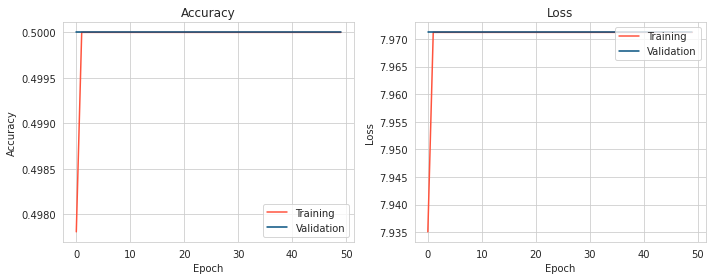

In [ ]:
plot_metrics(d1a_history1) 

Training model multiple times to get good accuracy and decrease overfitting

In [ ]:
d1a_model2, d1a_history2 = train_binary_model()

Train on 1824 samples, validate on 448 samples
Epoch 1/50
1824/1824 [==============================] - 2s 1ms/step - loss: 3.5183 - acc: 0.7007 - val_loss: 0.9418 - val_acc: 0.8728

Epoch 00001: val_acc improved from -inf to 0.87277, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 2/50
1824/1824 [==============================] - 2s 1ms/step - loss: 1.1070 - acc: 0.8158 - val_loss: 1.2118 - val_acc: 0.7612

Epoch 00002: val_acc did not improve from 0.87277
Epoch 3/50
1824/1824 [==============================] - 2s 853us/step - loss: 0.5492 - acc: 0.8503 - val_loss: 0.4986 - val_acc: 0.8460

Epoch 00003: val_acc did not improve from 0.87277
Epoch 4/50
1824/1824 [==============================] - 2s 840us/step - loss: 0.4496 - acc: 0.8618 - val_loss: 0.2696 - val_acc: 0.8906

Epoch 00004: val_acc improved from 0.87277 to 0.89062, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 5/50
1824/1824 [==============================] - 2s 874us/ste

Best Model:
epoch: 16 , val_acc: 0.9241071428571429 , val_loss: 0.5596417097374667
None


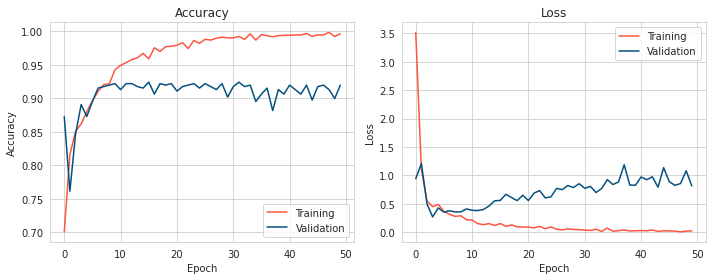

In [ ]:
plot_metrics(d1a_history2)

In [ ]:
d1a_model3, d1a_history3 = train_binary_model()

Train on 1824 samples, validate on 448 samples
Epoch 1/50
1824/1824 [==============================] - 2s 1ms/step - loss: 1.5917 - acc: 0.7632 - val_loss: 0.4067 - val_acc: 0.8571

Epoch 00001: val_acc improved from -inf to 0.85714, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 2/50
1824/1824 [==============================] - 2s 861us/step - loss: 0.5434 - acc: 0.8191 - val_loss: 0.3653 - val_acc: 0.8460

Epoch 00002: val_acc did not improve from 0.85714
Epoch 3/50
1824/1824 [==============================] - 2s 842us/step - loss: 0.4728 - acc: 0.8596 - val_loss: 0.4873 - val_acc: 0.8415

Epoch 00003: val_acc did not improve from 0.85714
Epoch 4/50
1824/1824 [==============================] - 2s 835us/step - loss: 0.3990 - acc: 0.8777 - val_loss: 0.2964 - val_acc: 0.9040

Epoch 00004: val_acc improved from 0.85714 to 0.90402, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 5/50
1824/1824 [==============================] - 2s 859us/s

Best Model:
epoch: 26 , val_acc: 0.9285714285714286 , val_loss: 0.6424328041881141
None


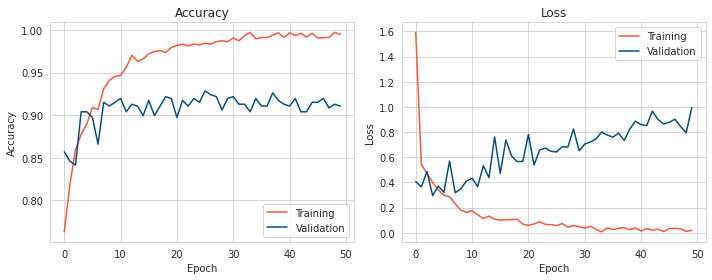

In [ ]:
plot_metrics(d1a_history3)

In [ ]:
d1a_model4, d1a_history4 = train_binary_model()

Train on 1824 samples, validate on 448 samples
Epoch 1/50
1824/1824 [==============================] - 2s 1ms/step - loss: 7.9293 - acc: 0.4984 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 2/50
1824/1824 [==============================] - 2s 869us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/50
1824/1824 [==============================] - 2s 877us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/50
1824/1824 [==============================] - 2s 860us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/50
1824/1824 [==============================] - 2s 892us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

E

Best Model:
epoch: 1 , val_acc: 0.5 , val_loss: 7.97119241952899
None


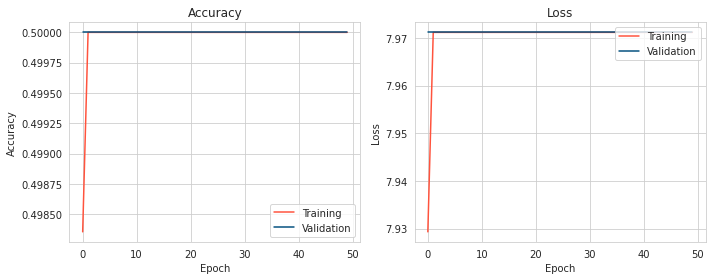

In [ ]:
plot_metrics(d1a_history4)

In [ ]:
d1a_model5, d1a_history5 = train_binary_model()

Train on 1824 samples, validate on 448 samples
Epoch 1/50
1824/1824 [==============================] - 2s 1ms/step - loss: 7.8800 - acc: 0.4984 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 2/50
1824/1824 [==============================] - 2s 861us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/50
1824/1824 [==============================] - 2s 841us/step - loss: 6.6605 - acc: 0.5548 - val_loss: 1.6792 - val_acc: 0.8393

Epoch 00003: val_acc improved from 0.50000 to 0.83929, saving model to /content/drive/MyDrive/data1a/top_model_weights.h5
Epoch 4/50
1824/1824 [==============================] - 2s 851us/step - loss: 2.2668 - acc: 0.7961 - val_loss: 1.7217 - val_acc: 0.8237

Epoch 00004: val_acc did not improve from 0.83929
Epoch 5/50
1824/1824 [==============================] - 2s 849us/s

Best Model:
epoch: 11 , val_acc: 0.9308035714285714 , val_loss: 0.35352594543447985
None


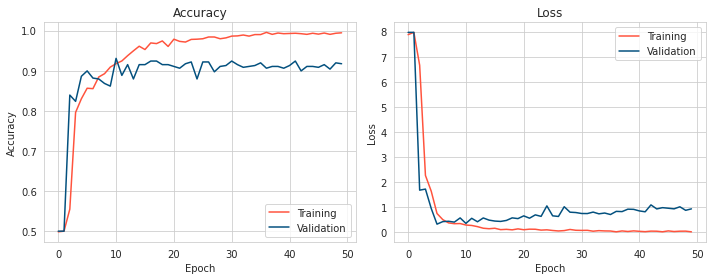

In [ ]:
plot_metrics(d1a_history5)

After 5 iterations we get 93% validation accuracy and validation loss decreased to 35%

In [ ]:
## fine tuning
ft_model, ft_history = finetune_binary_model()

Model loaded.
Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/50
114/114 [==============================] - 48s 421ms/step - loss: 8.0325 - acc: 0.5016 - val_loss: 8.1310 - val_acc: 0.4955

Epoch 00001: val_acc improved from -inf to 0.49554, saving model to /content/drive/MyDrive/data1a/ft_model.h5
Epoch 2/50
114/114 [==============================] - 49s 432ms/step - loss: 8.0502 - acc: 0.5005 - val_loss: 8.0953 - val_acc: 0.4977

Epoch 00002: val_acc improved from 0.49554 to 0.49775, saving model to /content/drive/MyDrive/data1a/ft_model.h5
Epoch 3/50
114/114 [==============================] - 48s 417ms/step - loss: 8.1209 - acc: 0.4962 - val_loss: 7.7686 - val_acc: 0.5180

Epoch 00003: val_acc improved from 0.49775 to 0.51802, saving model to /content/drive/MyDrive/data1a/ft_model.h5
Epoch 4/50
114/114 [==============================] - 48s 417ms/step - loss: 7.9972 - acc: 0.5038 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00004: val_acc di

Best Model:
epoch: 42 , val_acc: 0.524774774237796 , val_loss: 7.659725674637803
None


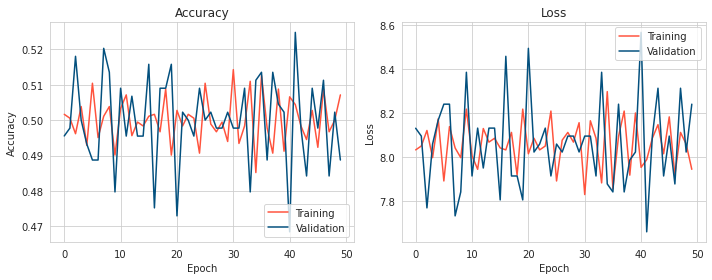

In [ ]:
plot_metrics(ft_history)

# Load Model

In [ ]:
ft_model = load_model(location+'/ft_model.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:
with open('/content/drive/MyDrive/data1a/top_history.txt') as f:    
    top_history = json.load(f)

In [ ]:
with open('/content/drive/MyDrive/data1a/ft_history.txt') as f:    
    ft_history = json.load(f)

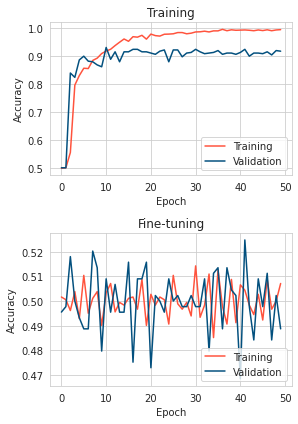

In [ ]:
plot_acc_metrics(top_history, ft_history)

In [ ]:
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

In [ ]:
cm = evaluate_binary_model(ft_model, validation_data_dir, validation_labels)

In [ ]:
heatmap_labels = ['Damaged', 'Whole']

In [ ]:
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g', cmap='OrRd', xticklabels=heatmap_labels, yticklabels=heatmap_labels)

In [ ]:
# sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g', cmap='Blues', xticklabels=heatmap_labels, yticklabels=heatmap_labels)

In [ ]:
def is_damaged(image_path,model):
  # save the image of url as save.jpg
    #urllib.request.urlretrieve(image_path, 'save.jpg')
    #load image 
    #img = load_img('save.jpg', target_size=(256,256))
    #convert image to array
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)/255
    # Get the prediction of train model on image
    pred = model.predict(x)
    #print("Car is Damaged")
    print(pred)
    if(pred[0][0]<=0.5):
      # if prediction is less than 50% then the car is damaged
        print("Car is Damaged")
    else:
        print ("No Damage Found")
        print ("Try Again")

In [ ]:
Image('http://3.bp.blogspot.com/-PrRY9XxCqYQ/UDNutnMI7LI/AAAAAAAABdw/UGygghh-hRA/s1600/Bumper+scuff.JPG')

In [ ]:
is_damaged('http://3.bp.blogspot.com/-PrRY9XxCqYQ/UDNutnMI7LI/AAAAAAAABdw/UGygghh-hRA/s1600/Bumper+scuff.JPG',ft_model)

Car is Damaged
[[1.4177607e-16]]
Validation complete - proceed to location and severity determination


In [ ]:
is_damaged('https://i.ytimg.com/vi/4oV1klVPogY/maxresdefault.jpg',ft_model)

Car is Damaged
[[4.277531e-09]]
Validation complete - proceed to location and severity determination
